In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
alldata = pd.concat([train, test],axis=0)

In [4]:
alldata.shape

(1309, 12)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
alldata['Family']=alldata['SibSp']+alldata['Parch']

In [7]:
alldata=alldata.drop(['Ticket','Cabin','SibSp','Parch','PassengerId','Name'],axis=1)

In [8]:
ID = test['PassengerId']

In [9]:
alldata.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family'], dtype='object')

# 欠損値の対応


In [10]:
alldata['Age'] = alldata['Age'].fillna(np.nanmean(alldata['Age']))
alldata.isna().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          1
Embarked      2
Family        0
dtype: int64

In [11]:
alldata['Fare'] = alldata['Fare'].fillna(np.nanmean(alldata['Fare']))
alldata.isna().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Family        0
dtype: int64

In [12]:
alldata['Embarked'] = alldata['Embarked'].fillna(alldata['Embarked'].mode())
alldata.isna().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      2
Family        0
dtype: int64

# カテゴリカル変数をOne-Hot Encodingで変換

In [13]:
alldata = pd.get_dummies(alldata)

In [14]:
train = alldata.iloc[:train.shape[0],:]
test = alldata.iloc[train.shape[0]:,:]

In [15]:
target_col = 'Survived'
feature_cols = [col for col in alldata.columns if col not in target_col]

In [16]:
X_train = train[feature_cols]
y_train = train[target_col]
X_test = test[feature_cols]

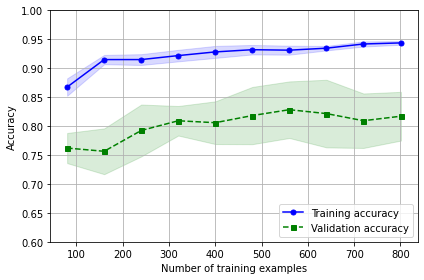

Wall time: 21.2 s


In [17]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state=0)

# pipe_lr = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2', random_state=1,
#                                            solver='lbfgs', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

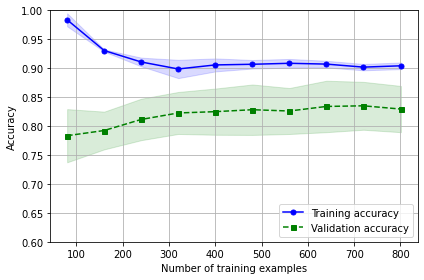

Wall time: 1min 38s


In [18]:
%%time
from catboost import CatBoostClassifier

model = CatBoostClassifier(random_state=0, silent=True)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.0])
plt.tight_layout()
plt.show()

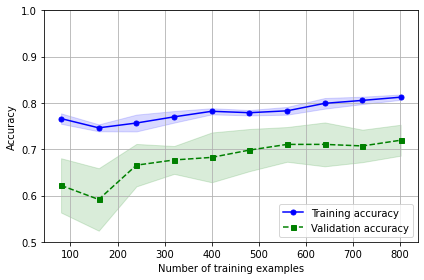

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [20]:
%%time
from sklearn.model_selection import cross_val_score

KNN= KNeighborsClassifier()
LGBC=LGBMClassifier()
CATC=CatBoostClassifier(silent=True)

clf_labels = ['KNN', 'LGBC', 'CATC']

print('10 Fold cross validation\n')
for clf, label in zip([KNN, LGBC, CATC],clf_labels):
    scores=cross_val_score(estimator=clf, X=X_train, y=y_train,
                           cv=10, scoring='accuracy')#, scoring='mean_squared_error'
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


10 Fold cross validation

Accuracy: 0.72 (+/- 0.04) [KNN]
Accuracy: 0.81 (+/- 0.04) [LGBC]
Accuracy: 0.83 (+/- 0.04) [CATC]
Wall time: 15.6 s


In [21]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='classlabel')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        y : array-like, shape = [n_examples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Matrix of training examples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_examples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_examples, n_classes]
            Weighted average probability for each class per example.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in self.named_classifiers.items():
                for key, value in step.get_params(deep=True).items():
                    out['%s__%s' % (name, key)] = value
            return out

In [22]:
%%time
mv_clf = MajorityVoteClassifier(classifiers=[KNN, LGBC, CATC])

clf_labels = clf_labels + ['Majority voting']
all_clf = [KNN, LGBC, CATC, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train,
                             cv=10, scoring='accuracy')
    print('Accuracy: %0.2f (± %0.2f)[%s]' % (scores.mean(), scores.std(), label))

Accuracy: 0.72 (± 0.04)[KNN]
Accuracy: 0.81 (± 0.04)[LGBC]
Accuracy: 0.83 (± 0.04)[CATC]
Accuracy: 0.82 (± 0.04)[Majority voting]
Wall time: 31.3 s


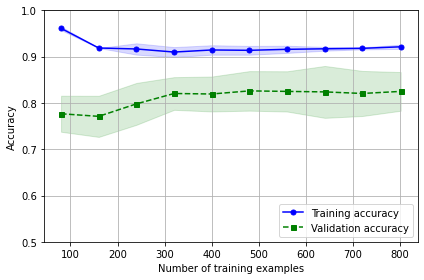

In [23]:
mv_clf = MajorityVoteClassifier(classifiers=[KNN, LGBC, CATC])
model = mv_clf

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=model,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

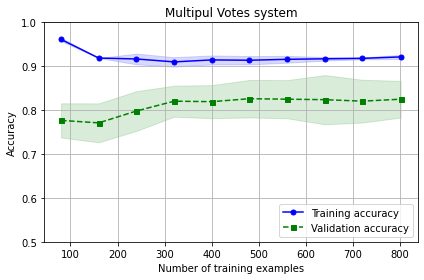

In [24]:
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.title('Multipul Votes system')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

In [25]:
!pip install pycaret

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] アクセスが拒否されました。: 'C:\\Users\\tomoyuki.kawashita\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [26]:
pip install numpy --upgrade

  Using cached numpy-1.20.1-cp38-cp38-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you'll have numpy 1.20.1 which is incompatible.
pycaret 2.3.0 requires numpy==1.19.5, but you'll have numpy 1.20.1 which is incompatible.


In [27]:
import numpy
print(numpy.__version__)

1.20.1


In [28]:
pip install pandas --upgrade

Requirement already up-to-date: pandas in c:\users\tomoyuki.kawashita\anaconda3\lib\site-packages (1.2.3)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas
print(pandas.__version__)

1.2.3


In [30]:
train = pd.concat([X_train,y_train],axis=1)
train.shape

(891, 10)

In [31]:
from pycaret.classification import *
exp1 = setup(train, target = 'Survived')

,Description,Value
0,session_id,2120
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(891, 10)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8267,0.8660,0.7328,0.8065,0.7651,0.6288,0.6332,0.0110
catboost,CatBoost Classifier,0.8266,0.8739,0.7040,0.8315,0.7586,0.6253,0.6337,1.0760
gbc,Gradient Boosting Classifier,0.8235,0.8631,0.7038,0.8184,0.7551,0.6187,0.6243,0.0160
ada,Ada Boost Classifier,0.8123,0.8492,0.7578,0.7601,0.7553,0.6037,0.6074,0.0160
lr,Logistic Regression,0.8091,0.8467,0.7042,0.7853,0.7391,0.5901,0.5952,0.3900
ridge,Ridge Classifier,0.8091,0.0000,0.6960,0.7897,0.7366,0.5887,0.5942,0.0050
lda,Linear Discriminant Analysis,0.8091,0.8444,0.6960,0.7897,0.7366,0.5887,0.5942,0.0060
rf,Random Forest Classifier,0.7897,0.8562,0.6997,0.7477,0.7201,0.5524,0.5557,0.0370
et,Extra Trees Classifier,0.7833,0.8253,0.7122,0.7264,0.7174,0.5421,0.5441,0.0340
dt,Decision Tree Classifier,0.7705,0.7594,0.7000,0.7133,0.7009,0.5158,0.5212,0.0050


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2120, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [36]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8095,0.8053,0.6000,0.8824,0.7143,0.5791,0.6033
1,0.8889,0.9421,0.9200,0.8214,0.8679,0.7726,0.7763
2,0.7460,0.8300,0.6000,0.7143,0.6522,0.4545,0.4588
3,0.8710,0.8827,0.7917,0.8636,0.8261,0.7238,0.7256
4,0.8226,0.8827,0.7500,0.7826,0.7660,0.6232,0.6236
5,0.8226,0.8734,0.7083,0.8095,0.7556,0.6173,0.6207
6,0.8226,0.8498,0.7500,0.7826,0.7660,0.6232,0.6236
7,0.8065,0.8849,0.7083,0.7727,0.7391,0.5857,0.5871
8,0.8548,0.8640,0.7917,0.8261,0.8085,0.6917,0.6921
9,0.8226,0.8454,0.7083,0.8095,0.7556,0.6173,0.6207


In [39]:
lgbm.get_params

<bound method LGBMModel.get_params of LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2120, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)>

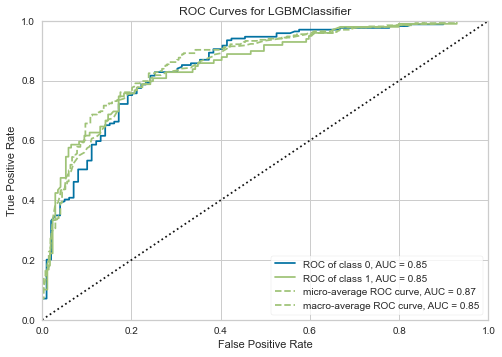

In [45]:
#https://pycaret.org/plot-model/
model = lgbm
plot_model(model,'auc')

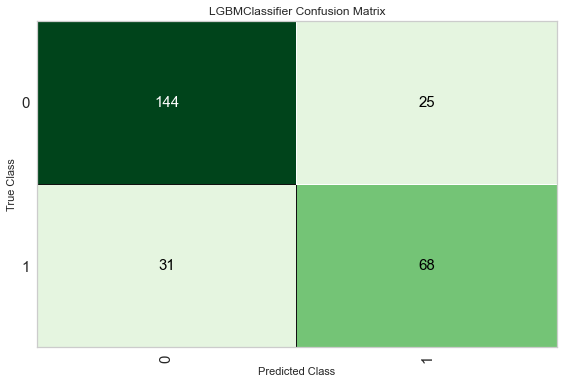

In [46]:
plot_model(model,'confusion_matrix')

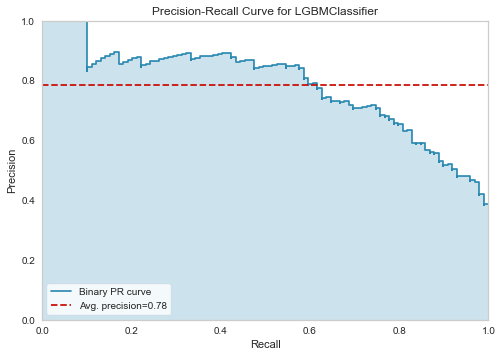

In [50]:
plot_model(model,'pr')

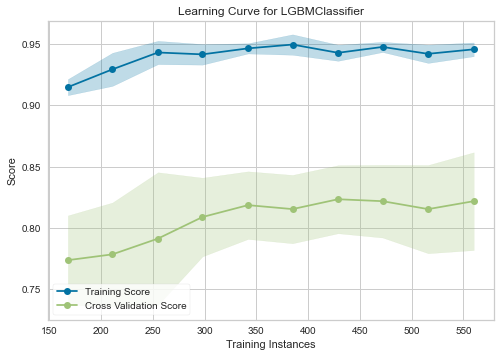

In [54]:
plot_model(model,'learning')

In [ ]:
X_test.isna().sum()

In [ ]:
submission = pd.DataFrame({'PassengerId':ID,'Survived':y_pred})

In [ ]:
submission['Survived']=submission['Survived'].replace(0.0,'0').replace(1.0,'1')

In [ ]:
submission.to_csv('submission.csv',index=False)